In [1]:
import geopandas as gpd 
import pandas as pd

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
DEFAULT_CRS = "EPSG:4326"

# read building data


In [4]:

buildings_sp = gpd.read_parquet("spBuilding.geoparquet")

In [86]:
buildings_sp.head()

,id,geometry,bbox,version,sources,subtype,class,names,level,has_parts,height,is_underground,num_floors,num_floors_underground,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height
0,08ba810bb37aefff02009831cd3b254c,"POLYGON ((-46.88996 -23.86305, -46.89000 -23.8...","{'xmin': -46.89012145996094, 'xmax': -46.88995...",0,"[{'property': '', 'dataset': 'Microsoft ML Bui...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN
1,08ba810bb37aafff0200a4b6110a6c95,"POLYGON ((-46.88996 -23.86285, -46.88994 -23.8...","{'xmin': -46.88996505737305, 'xmax': -46.88987...",0,"[{'property': '', 'dataset': 'Microsoft ML Bui...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN
2,08ba810bb37aafff0200b49d85edc9f4,"POLYGON ((-46.88983 -23.86263, -46.88988 -23.8...","{'xmin': -46.88997268676758, 'xmax': -46.88978...",0,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN
3,08ba810bb378cfff0200fa97298c73ab,"POLYGON ((-46.88989 -23.86245, -46.88993 -23.8...","{'xmin': -46.8900032043457, 'xmax': -46.889888...",0,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN
4,08ba810bb3781fff0200e2009d05e7e3,"POLYGON ((-46.88963 -23.86242, -46.88968 -23.8...","{'xmin': -46.88974380493164, 'xmax': -46.88962...",0,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN


<Axes: >

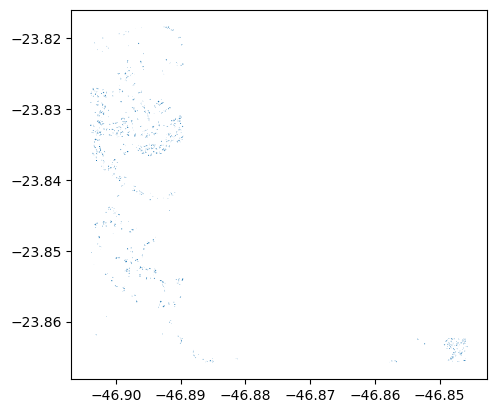

In [50]:
buildings_sp.iloc[range(1000)].plot()

## Calculate the area of each polygon

In [13]:
buildings_sp["area"] = (
    buildings_sp
    .geometry
    .to_crs("EPSG:5641")
    .area) # Area may be invalid for a geographic CRS using degrees as units; use GeoSeries.to_crs() to project geometries to a planar CRS before using this function.


In [ ]:
buildings_sp.head()

In [52]:
''''
buildings_sp["centroid"] = (
    buildings_sp
    .centroid)
buildings_sp = buildings_sp.set_geometry("centroid")
'''

'\'\nbuildings_sp["centroid"] = (\n    buildings_sp\n    .centroid)\nbuildings_sp = buildings_sp.set_geometry("centroid")\n'

# Reading h2 

In [7]:
hex_sp = gpd.read_file("data/shapeFiles/wgs84_hex_grid_sp_v2")

In [54]:
hex_sp.head()

,fid,id_hex,abbrev_mun,name_muni,code_muni,geometry
0,2563.0,89a81009a8bffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.43596 -23.58661, -46.43800 -23.5..."
1,2564.0,89a8108dca7ffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.77886 -23.89706, -46.78089 -23.8..."
2,2565.0,89a81015a8bffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.74000 -23.72290, -46.74204 -23.7..."
3,2566.0,89a810019d7ffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.62778 -23.65457, -46.62982 -23.6..."
4,2567.0,89a8100d9d7ffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.62335 -23.50435, -46.62539 -23.5..."


# Intersect data

In [8]:
if buildings_sp.crs != DEFAULT_CRS:
    buildings_sp = buildings_sp.to_crs(DEFAULT_CRS)
if hex_sp.crs != DEFAULT_CRS:
    hex_sp = hex_sp.to_crs(DEFAULT_CRS)

In [37]:


building_join_h3 =  buildings_sp.overlay(hex_sp[['fid', 'geometry']], how='intersection')


In [16]:
building_join_h3.head()

,id,bbox,version,sources,subtype,class,names,level,has_parts,height,is_underground,num_floors,num_floors_underground,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height,area,fid,geometry
0,08ba8108d8249fff0200ca7b2cf5a925,"{'xmin': -46.77723693847656, 'xmax': -46.77717...",0,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN,18.832564,13628.0,"POLYGON ((-46.77719 -23.86549, -46.77719 -23.8..."
1,08ba8108d8249fff02003ef4010c610c,"{'xmin': -46.77711868286133, 'xmax': -46.77706...",0,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN,21.963520,13628.0,"POLYGON ((-46.77712 -23.86553, -46.77712 -23.8..."
2,08ba8108d82dafff02009972fbcc2d69,"{'xmin': -46.771846771240234, 'xmax': -46.7717...",0,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN,24.375538,14059.0,"POLYGON ((-46.77180 -23.86407, -46.77184 -23.8..."
3,08ba8108d82dafff020036c1ea1b6887,"{'xmin': -46.771915435791016, 'xmax': -46.7718...",0,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN,14.029866,14059.0,"POLYGON ((-46.77188 -23.86403, -46.77191 -23.8..."
4,08ba8108d82dafff020058d0d141470e,"{'xmin': -46.771976470947266, 'xmax': -46.7719...",0,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,NaN,False,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,NaN,20.166147,14059.0,"POLYGON ((-46.77193 -23.86400, -46.77197 -23.8..."


In [47]:
building_join_h3_na = building_join_h3.dropna(subset = ['fid'])

In [39]:
area_sum_by_hex = building_join_h3.groupby(['fid']).agg({
    "area": 'sum'
}).reset_index()

In [50]:
area_sum_by_hex.head()

,fid,area
0,2563.0,11255.834882
1,2567.0,90654.601079
2,2569.0,103.110937
3,2570.0,33828.905158
4,2572.0,1129.286007


In [52]:
print(hex_sp.shape)
print(area_sum_by_hex.shape)


(15059, 6)
(11021, 2)


In [62]:
hex_area = hex_sp.join(area_sum_by_hex.set_index('fid'), how='left', rsuffix='sum', on='fid')

In [64]:
hex_area['area_hex'] =  (
    hex_area
    .geometry
    .to_crs("EPSG:5641")
    .area) # Area may be invalid for a geographic CRS using degrees as units; use GeoSeries.to_crs() to project geometries to a planar CRS before using this function.
hex_area["area_const"] = hex_area['area']/ hex_area['area_hex']

In [65]:
hex_area.head()

,fid,id_hex,abbrev_mun,name_muni,code_muni,geometry,area,area_hex,area_const
0,2563.0,89a81009a8bffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.43596 -23.58661, -46.43800 -23.5...",11255.834882,126099.311483,0.089262
1,2564.0,89a8108dca7ffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.77886 -23.89706, -46.78089 -23.8...",NaN,125814.918518,NaN
2,2565.0,89a81015a8bffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.74000 -23.72290, -46.74204 -23.7...",NaN,125897.010258,NaN
3,2566.0,89a810019d7ffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.62778 -23.65457, -46.62982 -23.6...",NaN,125979.202351,NaN
4,2567.0,89a8100d9d7ffff,spo,Sao Paulo,3550308.0,"POLYGON ((-46.62335 -23.50435, -46.62539 -23.5...",90654.601079,126033.393325,0.719290


In [68]:
hex_area['area'].isna().sum()

0

In [67]:
hex_area['area'] = hex_area['area'].fillna(0)

<Axes: >

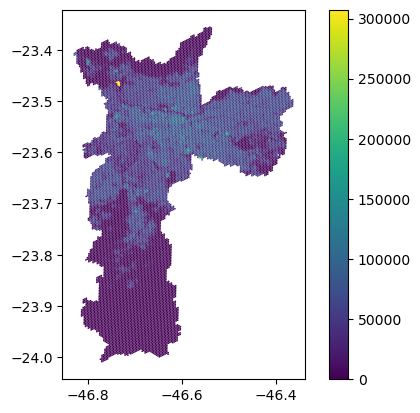

In [69]:
hex_area.plot(column='area', legend=True)

In [70]:
hex_area.to_file("data/shapeFiles/WGS84_hex_construcao")